<a id="start"></a>

<span style="padding: 0 05px"></span> [ <font color = "black" size ="3.5" > **Part 3, Section 15** <span style = "padding:0 2px"></span> **Kernel Support Vector Machine (classification)**](#sec_15) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.1 <span style = "padding:0 12px"></span> import mostly used libraries](#ref_1.1) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.2 <span style = "padding:0 12px"></span> import data frame and have a look on missing values](#ref_1.2) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.3 <span style = "padding:0 12px"></span> Splitting test and training sets](#ref_1.3) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.4 <span style = "padding:0 12px"></span> Splitting into test and training sets](#ref_1.4) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.5 <span style = "padding:0 12px"></span> Fitting kernel-SVM classification model](#ref_1.5) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.6 <span style = "padding:0 12px"></span> Performance of Logistic Regression](#ref_1.6) </font>   <br/>
<span style="padding: 0 40px"></span> [ <font color = "blue" size ="2" > 1.7 <span style = "padding:0 12px"></span> Visulation with <code>matplotlib</code](#ref_1.7) </font>   <br/>

### Sec 14. Support Vector Machine <a id="sec_16"></a>

<font color = "Brown" size ="3" >  
**Support Vector Machine**   
</font>
Two very useful SVM links are <br>
 <br>
https://www.youtube.com/watch?v=eUfvyUEGMD8 <br>
https://www.youtube.com/watch?v=kVfhpn0EuhQ <br>
https://www.youtube.com/watch?v=-ePtSxkmD4g <br>

<font color = "Brown" size ="3" >  
**Kernel Support Vector Machine** 
1): In Simple-SVM, the classification is linear <br>
2): Problem arise, when data is not linearly separable <br>
3): So the solution is to use the concept of Higher dimension, (project of data with some formula say 'square' on higher dim)  <br>
4): Draw the boundary line in Higher-dim space, this decision boundary can be a line or plan in 3D...  <br>
5): So the data is separable But its compute-expensive  <br>
6): Mathematical solution is to use "kernel" trick.. which gives almost the same result  <br>
7): So we select our region and apply the kernel...    <br>
</font>


[Back to Top](#start)

#### <font color = "navy" >1.1) import mostly used libraries </font> <a id="ref_1.1"></a>

In [1]:
%reset -f
import pandas as pd
import numpy as np

In [2]:
%ls

Social_Network_Ads.csv           classification_Kernel_SVM.ipynb


#### <font color = "navy" >1.2) import data frame and have a look on missing values</font> <a id="ref_1.2"></a>

In [3]:
tmp = pd.read_csv("Social_Network_Ads.csv")
tmp.head(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1


In [4]:
tmp.Gender = pd.Categorical(tmp.Gender,["Male","Female"])
print(tmp.dtypes)

User ID               int64
Gender             category
Age                   int64
EstimatedSalary       int64
Purchased             int64
dtype: object


In [5]:
tmp.Gender = tmp.Gender.cat.codes

In [6]:
tmp

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


<font color = "Brown" size ="4" >  
Indepedent variables=> X  <br/>
dependent => y (in classification, It is representing the Binary situation here) <br>    
</font>

In [7]:
X = tmp.iloc[:,[2,3]].values
y = tmp.Purchased.values

In [8]:
X.shape
y.shape

(400,)

In [13]:
print("X -->: INDEPENDENT type ")
print(np.array_str(X[0:10], precision = 3, suppress_small=True))
print("====================================================")
print("X -->: DEPENDENT, decision")
print(y)

X -->: INDEPENDENT type 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
X -->: DEPENDENT, decision
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 

In [14]:
# X  # ==> age, salary
# y  # ==> categorical variable (yes/no)

[Back to Top](#start)

#### <font color = "navy" >1.3) Splitting test and training sets </font> <a id="ref_1.3"></a>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [17]:
print("X_train")
# print(X_train)
print(X_train.shape)
print("=======")
print("X_test")
# print(X_test)
print(X_test.shape)
print("=======")
print("y_train")
# print(y_train)
print(y_train.shape)
print("=======")
print("y_test")
# print(y_test)
print(y_test.shape)

X_train
(300, 2)
X_test
(100, 2)
y_train
(300,)
y_test
(100,)


So based on X_train and y_train, I'll train our ML model and then  <br>
based on this model, I'll predict whether it matches with the test set .. or how close it is:

<font color = "Brown" size ="5" >  
**Adjust feature scalling for Logistic Regression (which is actually a classification)**
</font>

[Back to Top](#start)

#### <font color = "navy" >1.4) Feature scalling</font> <a id="ref_1.4"></a>

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<font color = "Brown" size ="3" >  
In above cell, we basically normalize the X_train and X_test only... <br>
    I think, I don't need to normalize the y_test in this cases, buz its only 0,1 <br>
</font>

[Back to Top](#start)

#### <font color = "navy" >1.5) Fitting kernel-SVM classification model</font> <a id="ref_1.5"></a>

<font color = "Brown" size ="3" >  
**The Logistic Regression is a linear classifier so need to import the linear library** <br>
</font>

- **<font color = 'blue' > traning the model</font>**

In [20]:
from sklearn.svm import SVC   # SVC ==> stands for Supprt Vector Classification

<font color = "Brown" size ="3" >  
1): Here we are using, kernel concept, (default='rbf') <br>
2): This is actually: the gaussian kernel.. <br>
3): Basically intiutively, it will prokect the data on Hogher-dim space based on Gaussian <br>
4): Once the project is done, seprateion which is a plabe Higher-dim is easy to set <br>
5): Projecting back, it will give the Higher-dim-place as a line in orignal 2-D space , here for example    
</font>

In [22]:
# Keep in mind, the kernel : very important parameter before using classifier
classifier = SVC(kernel="rbf", random_state=0)  # its a gaussian kernel; random_state = 0, to get the same results

In [23]:
# Training this kernel classifier with X_train (our training data) 
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

- **<font color = 'blue' > Get the predictions</font>**

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [26]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [27]:
X_test[1:10]

array([[-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441]])

[Back to Top](#start)

#### <font color = "navy" >1.6) Performance of Logistic Regression</font> <a id="ref_1.6"></a>

- **<font color = 'blue' >Create confusion matrix</font>**

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_pred,y_test)

In [30]:
cm

array([[64,  3],
       [ 4, 29]])

[Back to Top](#start)

#### <font color = "navy" >1.7) <code>contourf(  )</code> method pyplot plotting, for better Visulalization</font> <a id="ref_1.7"></a>

In [39]:
# This code can be use againt anad again, so give a separate name
# ==============================================================
X_set , y_set = X_train, y_train

In [40]:
# Preparation for grid mesh
# ===========================
print(f"X_min ==> {X_set.min()-1}")
print(f"X_min ==> {X_set.min()-1}")

X_min ==> -2.9931891594584856
X_min ==> -2.9931891594584856


In [41]:
# Define range baed on X_min, and X_max
# ======================================
x_axis_range = y_axis_range = np.arange(start = X_set.min()-1, stop =   X_set.max()+1, step = 0.01)

# This is so far a like 1-d Numpy array
# =====================================
print(x_axis_range.shape)
print(y_axis_range.shape)

(633,)
(633,)


In [42]:
# Finally define the mesh.. more detail is giving below this notebook
# ===================================================================
X1,X2 = np.meshgrid(x_axis_range , y_axis_range)

In [43]:
# Exclusively check the X1
# ==========================
X1

array([[-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       ...,
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.30681084,
         3.31681084,  3.32681084]])

In [44]:
print(X1.shape)
print(X2.shape)

(633, 633)
(633, 633)


<font color = "plotly_dark" size ="4" >  
Here, as I know the approach is to use each point of pixcel as a X_test data for the model to get prediction <br>
The model need this pixcel point of whatever the data is, same as of the format of X_train <br>
While <code>contourf(  )</code> pyplot method, need as a grid form.. so we need to tackle each separately <br>    
</font>

In [45]:
# Have a look , how is X_train shape look like
# Array of arrays, where each sub-array has two element, (Age, Salary)
# ====================================================================
X_train[0:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [46]:
# Here I'm preparing the grid for the model
# ===========================================
X1X2_grid_as___X_train_shape =  np.array([X1.ravel(),X2.ravel()]).T

In [47]:
# Feed the grid_data to the model and get prediction as Z variable
# ================================================================
Z_AS__y_train_shape =    classifier.predict(X1X2_grid_as___X_train_shape)

In [48]:
# This Z must be as of shape, like y_test, y_train or so
# =====================================================
Z_AS__y_train_shape
print(Z_AS__y_train_shape.shape)

(400689,)


In [49]:
# For countourf , plot, need to change the shape .... == X1 or X2 or grid data
# ========================================================================
Z_AS__X1_shape = Z_AS__y_train_shape.reshape(X1.shape)

In [50]:
# And here it is
# ===================
Z_AS__X1_shape.shape

(633, 633)

In [51]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

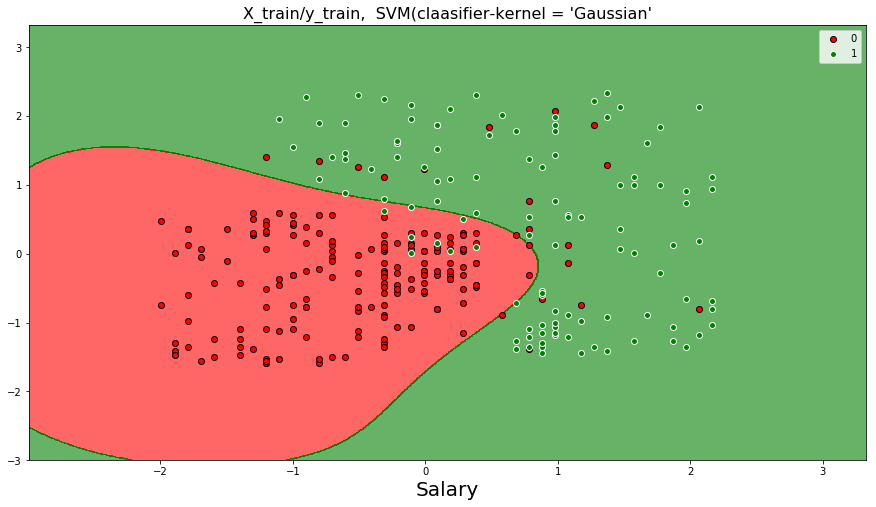

In [52]:
fig, ax = plt.subplots(figsize = (15,8))

# The contourf is for background pixel
# =======================================
ax.contourf(X1,X2,Z_AS__X1_shape,alpha = 0.60,cmap =  ListedColormap(("red","green")))

# First plot the "red" data points and then proceed for the green data points,, with decent automatic label
# =========================================================================================================
ax.scatter([i[0] for i in X_set[y_set ==0]], [i[1] for i in X_set[y_set ==0]] , edgecolor='black',facecolor = "red", label = 0 )
ax.scatter([i[0] for i in X_set[y_set ==1]], [i[1] for i in X_set[y_set ==1]] , facecolor = "green",edgecolor = "white" ,label = 1 )
ax.set_title("X_train/y_train,  SVM(claasifier-kernel = 'Gaussian'", size = 16, color = "black")
ax.set_xlabel("Age", size = 20)
ax.set_ylabel("Salary", size = 20)
ax.legend()


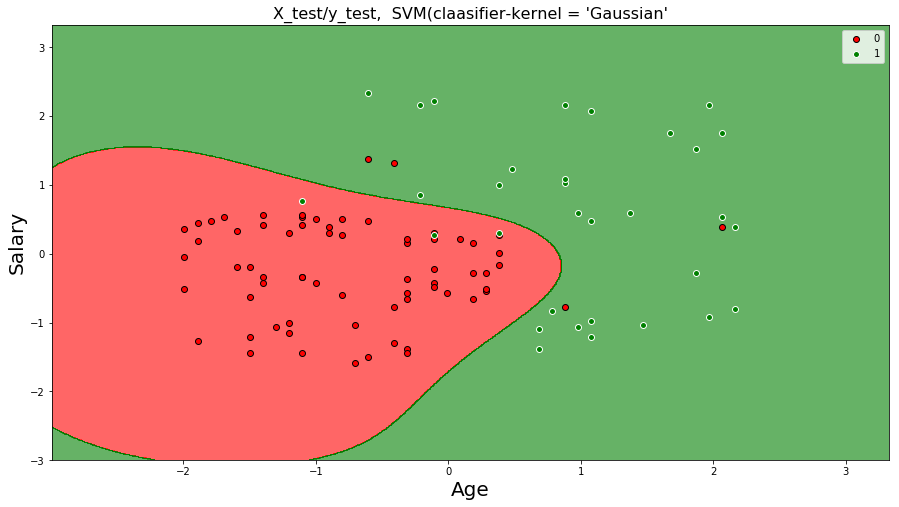

In [55]:
# This code can be use againt anad again, so give a separate name
# ==============================================================
X_set , y_set = X_test, y_test


# Define range baed on X_min, and X_max
# ======================================
x_axis_range = y_axis_range = np.arange(start = X_set.min()-1, stop =   X_set.max()+1, step = 0.01)

# This is so far a like 1-d Numpy array
# =====================================
# print(x_axis_range.shape)
# print(y_axis_range.shape)

# Finally define the mesh.. more detail is giving below this notebook
# ===================================================================
X1,X2 = np.meshgrid(x_axis_range , y_axis_range)


# Here I'm preparing the grid for the model
# ===========================================
X1X2_grid_as___X_train_shape =  np.array([X1.ravel(),X2.ravel()]).T

# Feed the grid_data to the model and get prediction as Z variable
# ================================================================
Z_AS__y_train_shape =    classifier.predict(X1X2_grid_as___X_train_shape)

# For countourf , plot, need to change the shape .... == X1 or X2 or grid data
# ========================================================================
Z_AS__X1_shape = Z_AS__y_train_shape.reshape(X1.shape)
#================================================================================
#================================================================================
#================================================================================
#================================================================================
fig, ax = plt.subplots(figsize = (15,8))

# The contourf is for background pixel
# =======================================
ax.contourf(X1,X2,Z_AS__X1_shape,alpha = 0.60,cmap =  ListedColormap(("red","green")))

# First plot the "red" data points and then proceed for the green data points,, with decent automatic label
# =========================================================================================================
ax.scatter([i[0] for i in X_set[y_set ==0]], [i[1] for i in X_set[y_set ==0]] , edgecolor='black',facecolor = "red", label = 0 )
ax.scatter([i[0] for i in X_set[y_set ==1]], [i[1] for i in X_set[y_set ==1]] , facecolor = "green",edgecolor = "white" ,label = 1 )
ax.set_title("X_test/y_test,  SVM(claasifier-kernel = 'Gaussian'", size = 16, color = "black")
ax.set_xlabel("Age", size = 20)
ax.set_ylabel("Salary", size = 20)
ax.legend()

# Calculate the number of points....

[Back to Top](#start)

#### <font color = "navy" >Unpacking and mesh plotting with plotly Review</font> <a id="ref_review"></a>

### List unpacking

In [52]:
lis_1 = [1,2,3,4,5,6]

In [53]:
h1, h2, h3, h4, h5, h6 = lis_1

In [54]:
print(f"| {h1} | {h2} | {h3} | {h4} | {h5} |")

| 1 | 2 | 3 | 4 | 5 |


### Array unpacking unpacking

In [55]:
lis_1 = [1,2,3,4,5,6]
lis_2 = [7,8,9]

In [56]:
arr = [lis_1,lis_2]
arr

[[1, 2, 3, 4, 5, 6], [7, 8, 9]]

In [57]:
e1,e2 = arr

In [58]:
e1

[1, 2, 3, 4, 5, 6]

In [59]:
e2

[7, 8, 9]

### Meshgrid unpacking unpacking

In [60]:
xvalues = [1,2,3,4,5,6]
yvalues = [7,8,9]

In [61]:
np.meshgrid(xvalues,yvalues)

[array([[1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6]]),
 array([[7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9]])]

<code>xvalues</code> will be repeated <code>len(yvalues)</code> times along yaxis,(V.down on computer screen) <br>
and <code>yvalues</code> will be repeated <code>len(xvalues)</code> times along xaxis,(LEFT/RIGHT on computer screen) <br>
This creates 2 arrays <br>


In [62]:
xx,yy = np.meshgrid(xvalues,yvalues)

In [63]:
xx

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

In [64]:
xx.shape

(3, 6)

In [65]:
yy

array([[7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9]])

In [66]:
yy.shape

(3, 6)

In [67]:
print(f"{yy[0]}")
print(f"{xx[0]}")

[7 7 7 7 7 7]
[1 2 3 4 5 6]


In [68]:
trace_1 = {
    "type"   :   "scatter",
    "mode"   :   "markers",
    "name"   :   "2D Mesh",
    "x"      :    xx[0],
    "y"      :    yy[0],
    "hoverinfo"  :      "x+y",
}


In [69]:
data = [trace_1]

In [70]:
graph_layout = {
      "title":"Linear Regression Model",
       "xaxis":{"title":"X_test values"},
       "yaxis":{"title":"Salaries"},
}

In [71]:
fig = Figure(data=data, layout=graph_layout)

In [72]:
pyo.iplot(fig)

In [73]:
traces = []

for j in range(len(yy)):
    traces.append({
            "type"   :   "scatter",
            "mode"   :    "markers",
            "y"      :  yy[j],
            "x"      :  xx[0],
        })

In [74]:
graph_layout = {
      "title":"2D Dots",
       "xaxis":{"title":"xvalues"},
       "yaxis":{"title":"yvalues"},
}

In [75]:
fig = Figure(data=traces, layout=graph_layout)

In [76]:
pyo.iplot(fig)